# House pricing prediction using regression model

### Name : Celine Ong Zi Ying              
### Matric No: 22004878
### Occurance : OCC 1             
### Lecturer : Erma Rahayu Binti Mohd Faizal Abdullah

## Data Analysis

In [1]:
# Import the numpy and pandas package
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# model development
from sklearn.linear_model import LinearRegression

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

# optimization
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
# Importing the data

data = pd.DataFrame(pd.read_csv("House Pricing.csv"))

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))


Inference: The Datset consists of 13 features & 545 samples.


In [3]:
# check the head of the data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# representing the number of rows and columns in the data
print('Data shape: ', data.shape)

Data shape:  (545, 13)


In [5]:
# provides information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# description of data
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

Text(0.5, 1.0, 'Pairplots for all the Feature')

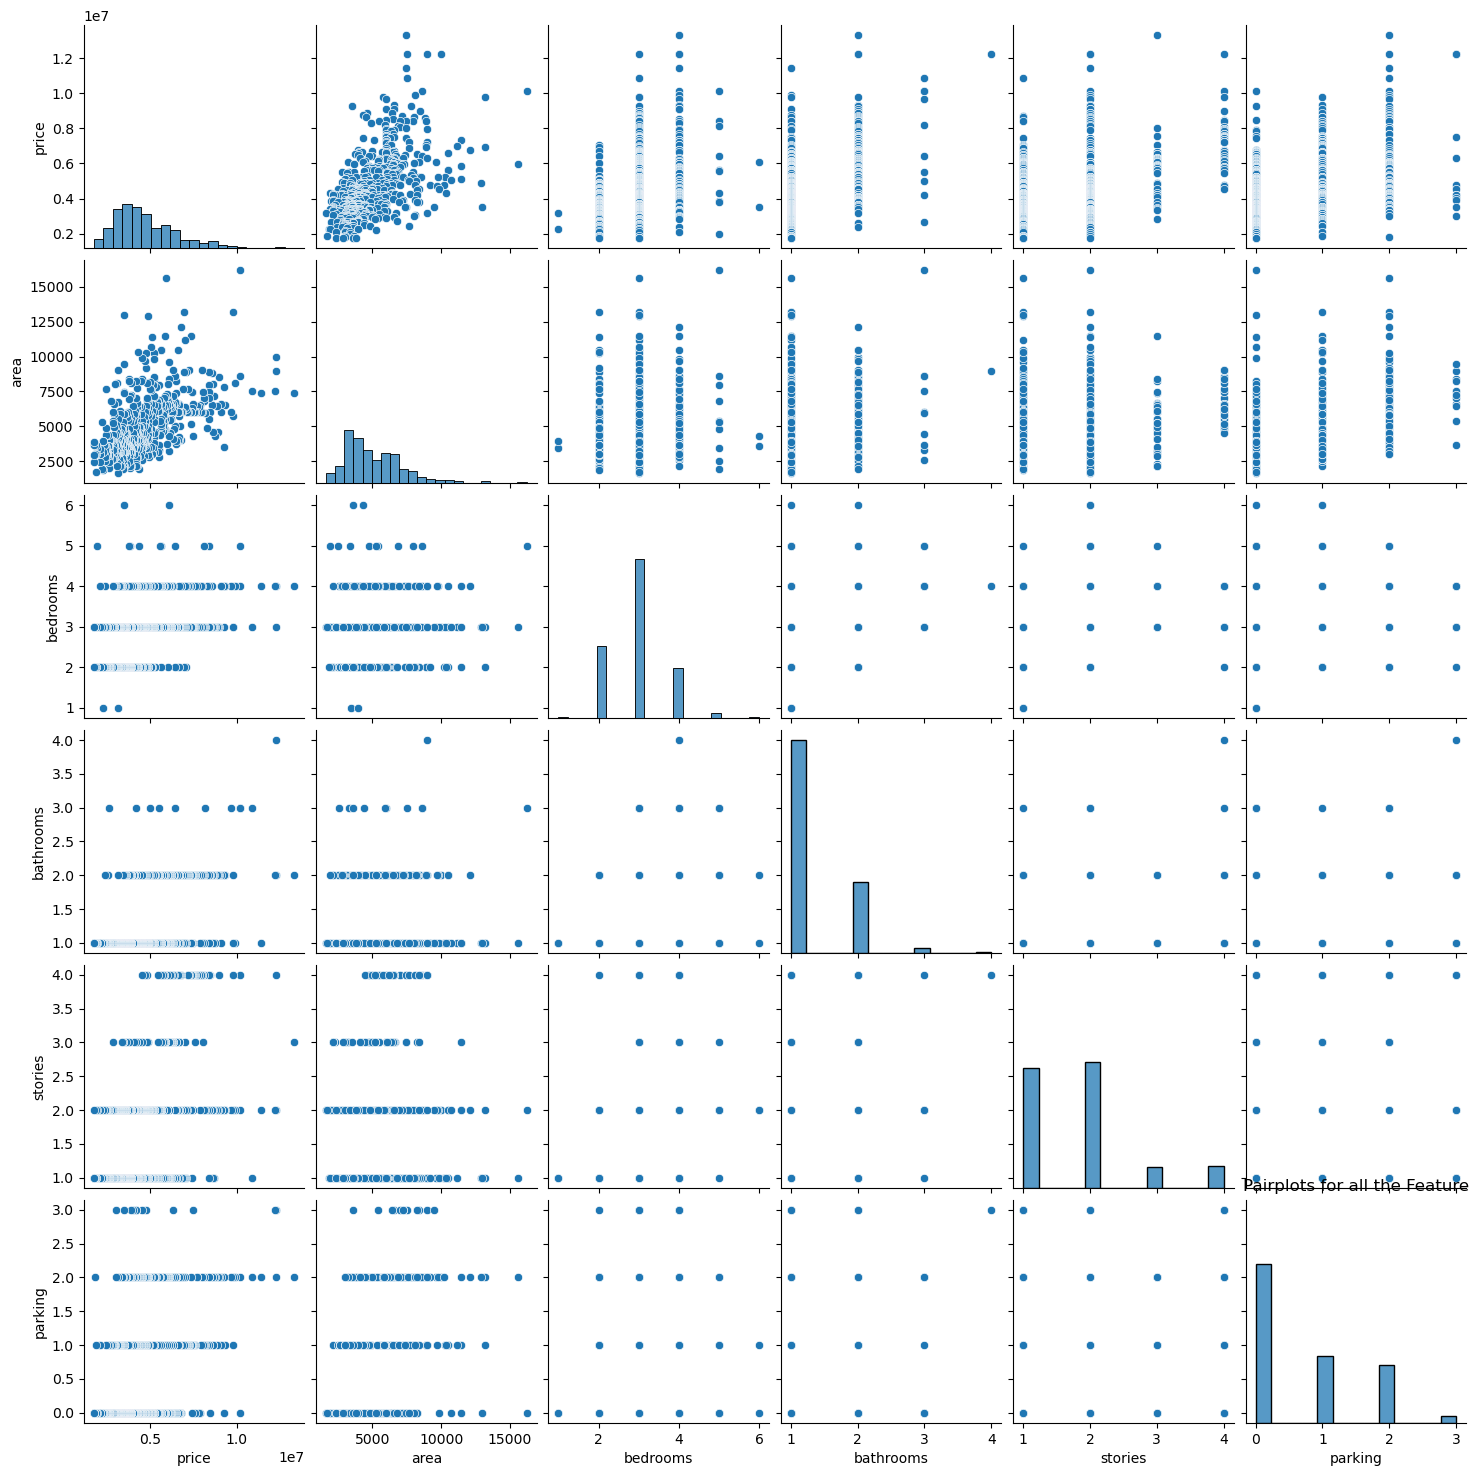

In [8]:
# Understanding the relationship between all the features

g = sns.pairplot(data)
plt.title('Pairplots for all the Feature')

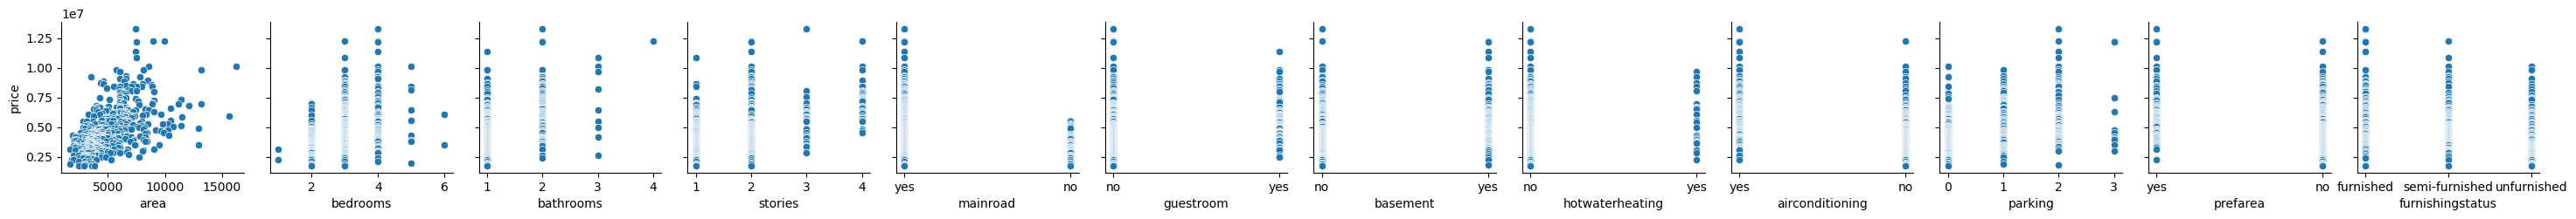

In [9]:
# Understanding the relationship between features and target variable
sns.pairplot(data, x_vars = data.drop(['price'],axis=1).columns, y_vars = ['price'])
plt.show()

<Figure size 800x400 with 0 Axes>

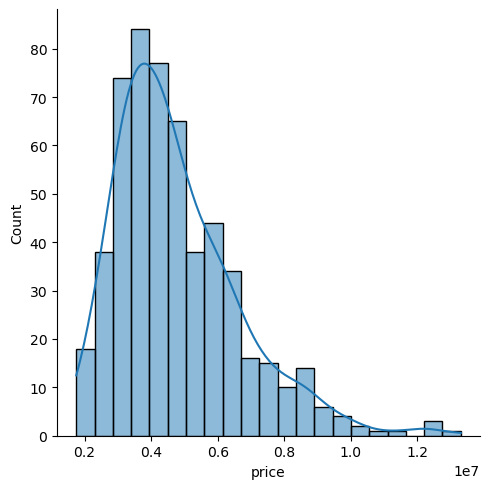

In [10]:
#Analyze the distribution of the target variable
target='price'
plt.figure(figsize=[8,4])
sns.displot(data=data, x = target,kde=True)

plt.show()
#The mode is at the forth box

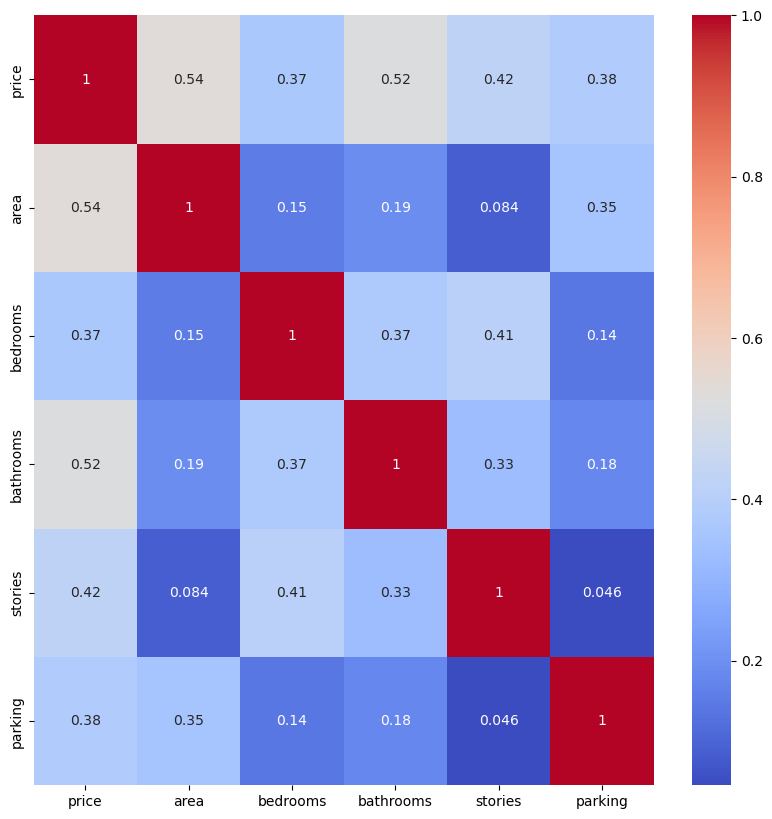

In [11]:
# Filter out non-numeric columns
numerical_features = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Set plot size
fig, ax = plt.subplots(figsize=(10, 10))

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Show plot
plt.show()

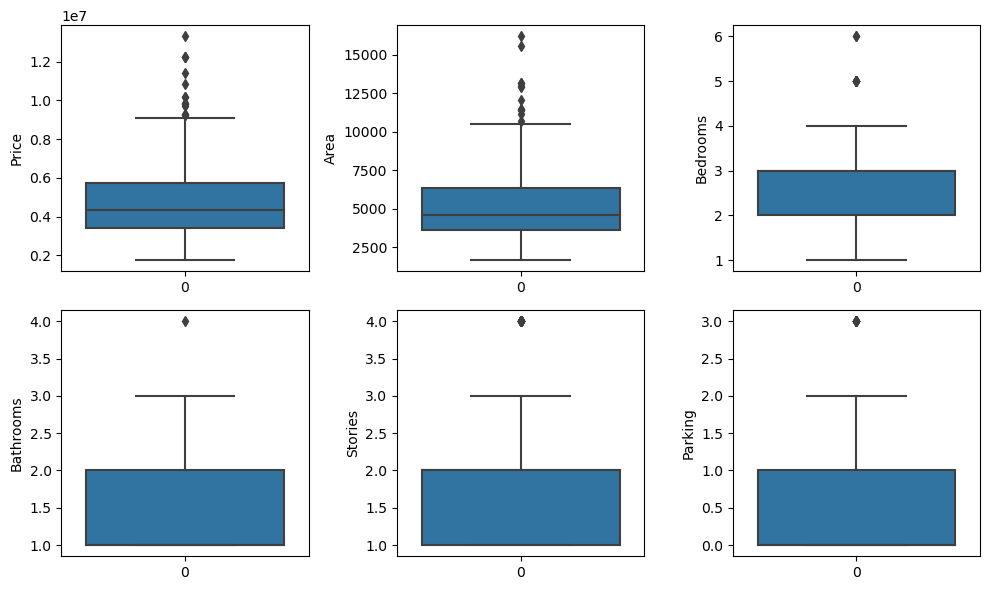

In [12]:
# Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = (10,6))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt1.set_ylabel('Price')
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt2.set_ylabel('Area')
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt3.set_ylabel('Bedrooms')
plt4 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt4.set_ylabel('Bathrooms')
plt5 = sns.boxplot(data['stories'], ax = axs[1,1])
plt5.set_ylabel('Stories')
plt6 = sns.boxplot(data['parking'], ax = axs[1,2])
plt6.set_ylabel('Parking')

plt.tight_layout()

# price and area have notable outliers

## Data Preprocessing

In [13]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [14]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = data.shape
datatemp = data.copy()
datatemp.drop_duplicates(inplace=True)

if datatemp.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset does not have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-datatemp.shape[0]}')
    
data = datatemp


Inference: The dataset does not have any duplicates


In [15]:
#Checking for null elements(data is clean if no null value)

nonull = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nonull['Percentage'] = round(nonull['Total Null Values']/data.shape[0],3)*100
print(nonull)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


**converting categorical variables into numerical variable**

In [16]:
# Check the dataframe now
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [17]:
# Convert the 'furnishingstatus' to numerical variables
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable called 'status'
status = pd.get_dummies(data['furnishingstatus'])

In [18]:
# Check the dataset 'status'
status.head(10)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


In [19]:
# Add the 'status' results to the original dataframe(data)

data = pd.concat([data, status], axis = 1)

In [20]:
# check the dataframe again
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,1,0,0


In [21]:
# Drop 'furnishingstatus' as we have created the dummies for it
# Drop 'furnished' because we don't need 3 column as 2 column is enough to show furnishing status
# 00 indicates furnished
# 01 indicates unfurnished
# 10 indicates semi-funished
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.drop(['furnished'], axis = 1, inplace = True)

In [22]:
# check the dataframe again
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [23]:
# representing the number of rows and columns in the data
print('Data shape: ', data.shape)

Data shape:  (545, 14)


## FEATURE SCALING
**Normalization**

In [24]:
#Rescaling the Features by using MinMax scaling

scaler = MinMaxScaler()

In [25]:
data_minmax = scaler.fit_transform(data)
data_minmax = pd.DataFrame(data_minmax, columns=data.columns)

data = data_minmax.copy()

In [26]:
# Display datasets after Normalization

display(data_minmax.describe())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.416514,0.326606
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
display(data_minmax.head(10))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
5,0.787879,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,1.0,0.0
6,0.727273,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0,0.0
7,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
8,0.703030,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.0,0.0
9,0.696970,0.281787,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0


                                                                             Correlation Matrix                                                                             


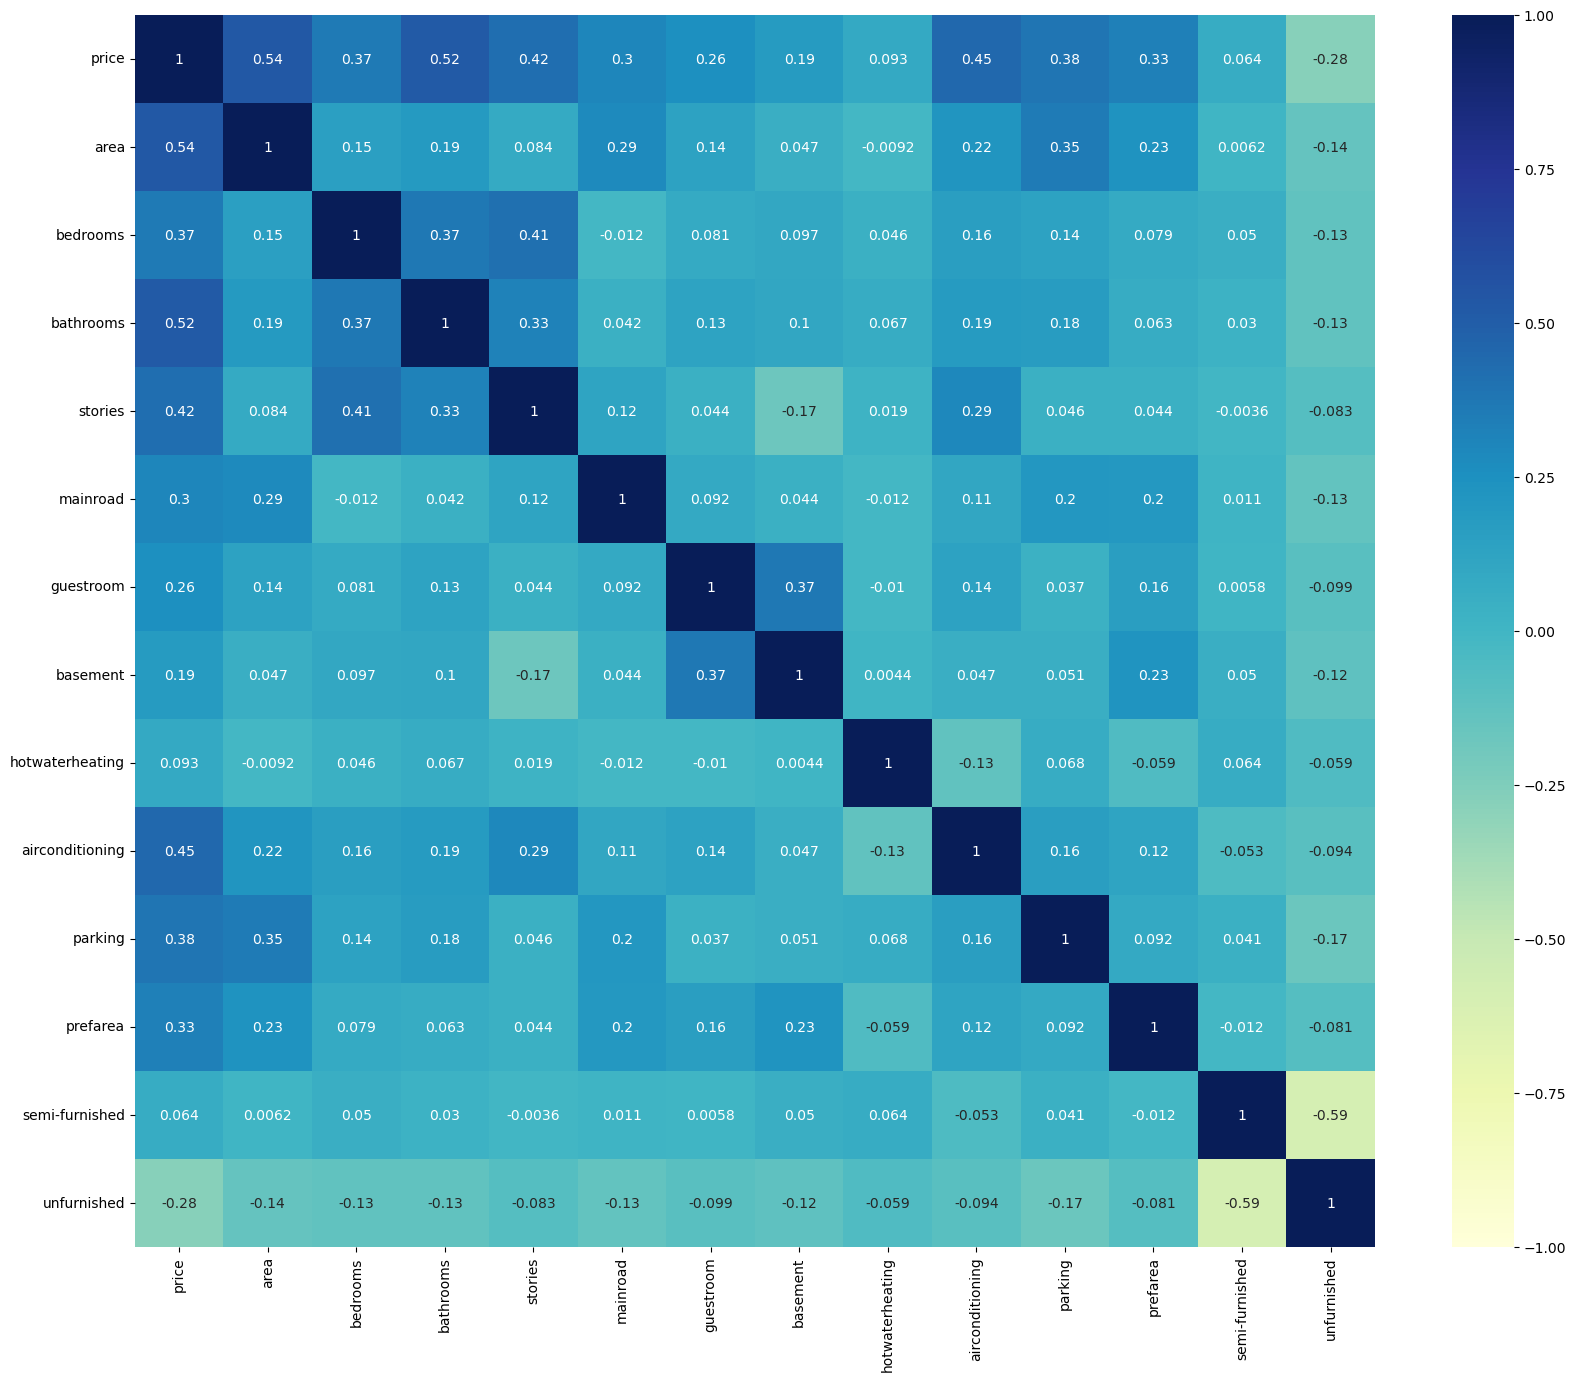

In [28]:
# Check correlation map

print('\033[1mCorrelation Matrix\033[0m'.center(180))
plt.figure(figsize=[20,16])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

# hotwaterheating and semi-furnished have a weak correlation with price
# If we are not dropping this two features, it will cause overfitting and get a bad performance after optimization.
# Droping hotwaterheating only will have a better before and after optimization performance than droping both hotwaterheating and semi-funitured

**SPLIT DATA INTO TRAINING AND TESTING SETS (for model building)**

In [29]:
# Split the data into 70% train and 30% test
# X indicates all the features except price and hotwaterheating
# Y indicates price
X = data.drop(['price', 'hotwaterheating'],axis=1)
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.reset_index(drop=True, inplace=True)

print('                 x       y ')
print('Training set:',X_train.shape,Y_train.shape)
print( 'Testing set:', X_test.shape, Y_test.shape)

                 x       y 
Training set: (381, 12) (381,)
Testing set: (164, 12) (164,)


## Model Development

In [30]:
# Fitting Multiple Linear Regression to the Training Set
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [31]:
# predict the training datasets and testing datasets
predict_Train = regression.predict(X_train)
predict_Test = regression.predict(X_test)

In [32]:
#Check current coefficient
print("Coefficient: \n",regression.coef_)

#Check intercept
print("\nIntercept: \n",regression.intercept_)

Coefficient: 
 [ 0.31962792  0.03552326  0.29193415  0.11151429  0.03488549  0.02269736
  0.04223446  0.05458272  0.08363015  0.04282457 -0.01081759 -0.0354496 ]

Intercept: 
 0.035834910569407796


**Residual Analysis(for training data)**

In [33]:
# calculate residual
res = (Y_train - predict_Train)

Text(0.5, 0, 'Errors')

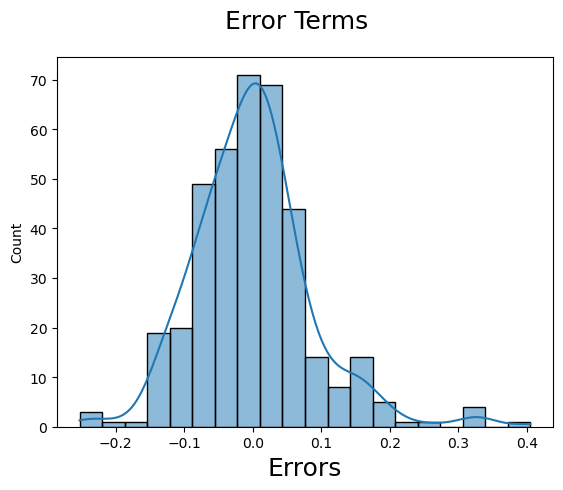

In [34]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((Y_train - predict_Train), kde=True, bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 18)                
# X-label
plt.xlabel('Errors', fontsize = 18)                        

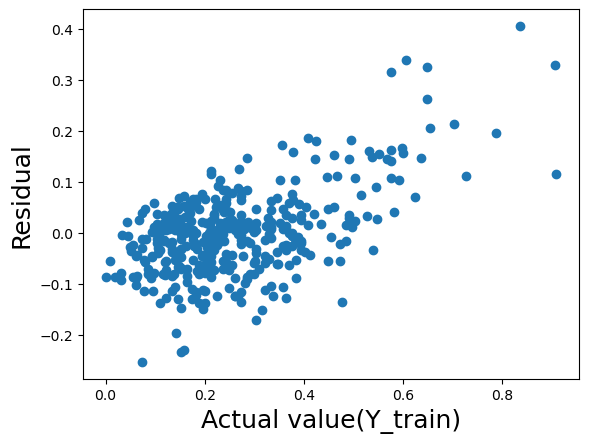

In [35]:
plt.scatter(Y_train,res)

plt.xlabel('Actual value(Y_train)', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)
plt.show()

In [36]:
# Evaluation of metrics for training data set

print('               Training DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_train, predict_Train),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_train-predict_Train)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_train, predict_Train),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_train, predict_Train)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_train - predict_Train)),10))

# Evaluation of metrics for testing data set

print('\n\n               Testing DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_test, predict_Test),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_test - predict_Test)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_test, predict_Test),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_test, predict_Test)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_test - predict_Test)),10))

               Training DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6874657912
  Residual Sum of Squares(RSS)  : 2.8041719037
  Mean Squared Error(MSE)       : 0.0073600312
  Root Mean Squared Error(RMSE) : 0.0857906244
  Mean Absolute Error (MAE)     : 0.0623095307


               Testing DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6337094165
  Residual Sum of Squares(RSS)  : 1.9391844243
  Mean Squared Error(MSE)       : 0.0118242953
  Root Mean Squared Error(RMSE) : 0.1087395755
  Mean Absolute Error (MAE)     : 0.0810590962


## Result Visualisation

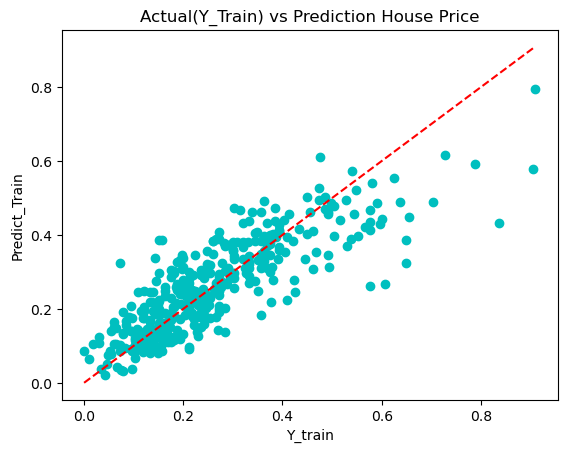

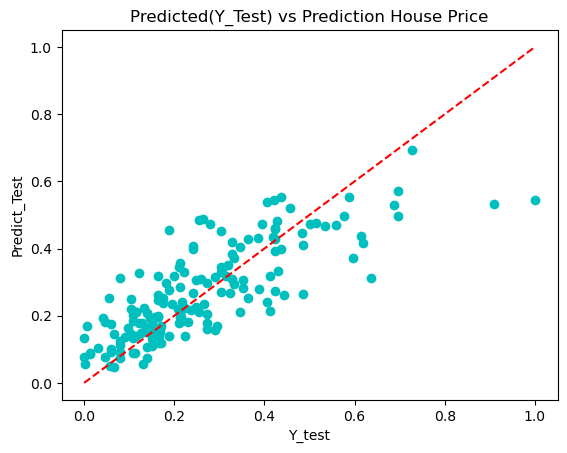

In [37]:
#To show Actual Y vs Predicted Y
#To show relation between actual and predicted price(Training dataset)

plt.scatter(Y_train,predict_Train,color='c')
plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
plt.title('Actual(Y_Train) vs Prediction House Price')         
plt.xlabel('Y_train')                       
plt.ylabel('Predict_Train')                       
plt.show()
print("\n")

#To show relation between actual and predicted price(Testing data)
plt.scatter(Y_test,predict_Test, color='c')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
plt.title('Predicted(Y_Test) vs Prediction House Price')         
plt.xlabel('Y_test')                       
plt.ylabel('Predict_Test')                       
plt.show()

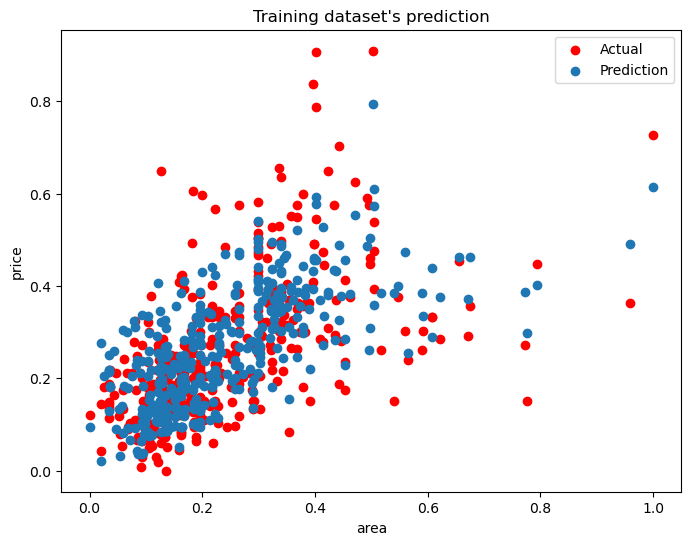

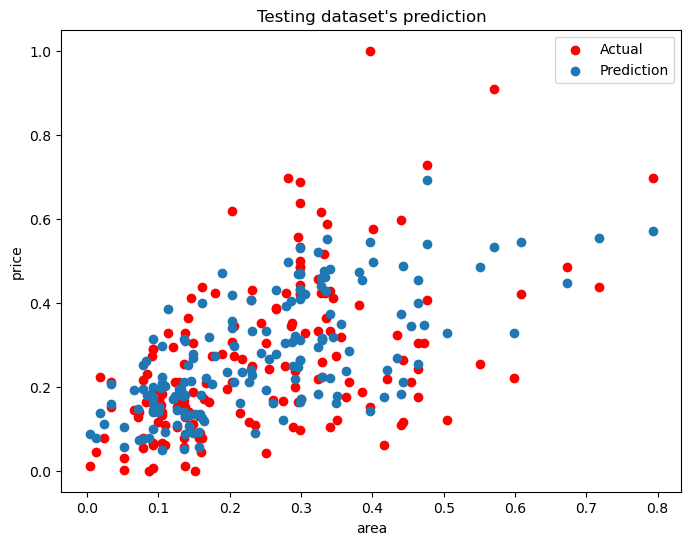

In [38]:
# show the scatter plot of actual and prediction in a same plane

# For Training dataset
plt.figure(figsize=[8,6])
plt.title('Training dataset\'s prediction')
plt.scatter(y=Y_train, x=X_train['area'], label = 'Actual',color='r')
plt.scatter(y=predict_Train, x=X_train['area'], label = 'Prediction')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()

# For Testing dataset
plt.figure(figsize=[8,6])
plt.title('Testing dataset\'s prediction')
plt.scatter(y=Y_test, x=X_test['area'], label = 'Actual', color='r')
plt.scatter(y=predict_Test, x=X_test['area'], label = 'Prediction')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()

## Learning curve
(to check if overfitting or underfitting is occuring in the model)

**Plain model**

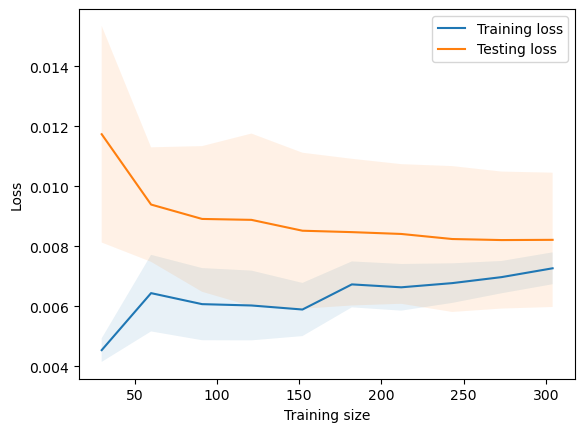

In [39]:
# define the training sizes for the learning curve
training_sizes = np.linspace(0.1, 1.0, 10)

# calculate the training and testing scores for different training sizes
training_sizes, training_scores, testing_scores = learning_curve(estimator=regression, X=X_train, y=Y_train, train_sizes=training_sizes, scoring='neg_mean_squared_error')

# calculate the mean and standard deviation of the training and testing scores
training_mean = -np.mean(training_scores, axis=1)
training_std = np.std(training_scores, axis=1)
testing_mean = -np.mean(testing_scores, axis=1)
testing_std = np.std(testing_scores, axis=1)

# plot the learning curve
plt.plot(training_sizes, training_mean, label='Training loss')
plt.fill_between(training_sizes, training_mean - training_std, training_mean + training_std, alpha=0.1)
plt.plot(training_sizes, testing_mean, label='Testing loss')
plt.fill_between(training_sizes, testing_mean - testing_std, testing_mean + testing_std, alpha=0.1)
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Hyperparameter Tunning


### **1. L1 Regularization(Lasso) and Grid SearchCV**

In [40]:
# define the parameter grid for Lasso regression
param_grid = {'alpha': [0.0001,0.001,0.002 ,0.01, 0.1, 1, 10, 100],
              'max_iter': [100,300,500,1000,5000]}

# define Lasso regression model
lasso = Lasso()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, Y_train)

# fit the model to find the best hyperparameters
best_params = grid_search.best_params_
lasso.set_params(**best_params).fit(X_train, Y_train)

print('Best Hyperparameters: ', best_params)

# evaluate the model
predictTrain_Lasso = lasso.predict(X_train)
predictTest_Lasso = lasso.predict(X_test)

Best Hyperparameters:  {'alpha': 0.0001, 'max_iter': 100}


#### Model Evaluation

In [41]:
# Evaluation of metrics for training data set after execute the L1 regularization and Grid SearchCV
print('After execute the L1 regularization and Grid SearchCV:\n')

print('               Training DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_train, predictTrain_Lasso),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_train - predictTrain_Lasso)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_train, predictTrain_Lasso),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_train, predictTrain_Lasso)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_train - predictTrain_Lasso)),10))

# Evaluation of metrics for testing data set after execute the L1 regularization and Grid SearchCV

print('\n\n               Testing DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_test, predictTest_Lasso),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_test - predictTest_Lasso)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_test, predictTest_Lasso),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_test, predictTest_Lasso)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_test - predictTest_Lasso)),10))

After execute the L1 regularization and Grid SearchCV:

               Training DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6874215249
  Residual Sum of Squares(RSS)  : 2.8045690774
  Mean Squared Error(MSE)       : 0.0073610737
  Root Mean Squared Error(RMSE) : 0.0857966998
  Mean Absolute Error (MAE)     : 0.0622526619


               Testing DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6340851217
  Residual Sum of Squares(RSS)  : 1.9371953976
  Mean Squared Error(MSE)       : 0.0118121671
  Root Mean Squared Error(RMSE) : 0.1086837939
  Mean Absolute Error (MAE)     : 0.0809493463


### **2. L2 Regularization(Ridge) and Grid SearchCV **

In [42]:
# define the parameter grid for Ridge regression 
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.09,0.1,1, 10, 100],
              'max_iter': [100,500,1000,1000,5000]}

# define Ridge regression model
ridge = Ridge()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator = ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# fit the model to find the best hyperparameters
best_params = grid_search.best_params_
ridge.set_params(**best_params).fit(X_train, Y_train)

print('Best Hyperparameters: ', best_params)

# evaluate the model
predictTrain_Ridge = ridge.predict(X_train)
predictTest_Ridge = ridge.predict(X_test)

Best Hyperparameters:  {'alpha': 0.1, 'max_iter': 100}


#### Model Evaluation

In [43]:
# Evaluation of metrics for training data set after execute the L2 regularization and Grid SearchCV

print('After execute the L2 regularization and Grid SearchCV:\n')

print('               Training DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_train, predictTrain_Ridge),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_train - predictTrain_Ridge)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_train, predictTrain_Ridge),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_train, predictTrain_Ridge)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_train - predictTrain_Ridge)),10))

# Evaluation of metrics for testing data set after execute the L2 regularization and Grid SearchCV

print('\n\n               Testing DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_test, predictTest_Ridge),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_test - predictTest_Ridge)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_test, predictTest_Ridge),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_test, predictTest_Ridge)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_test - predictTest_Ridge)),10))

After execute the L2 regularization and Grid SearchCV:

               Training DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6874426811
  Residual Sum of Squares(RSS)  : 2.8043792559
  Mean Squared Error(MSE)       : 0.0073605755
  Root Mean Squared Error(RMSE) : 0.0857937962
  Mean Absolute Error (MAE)     : 0.0623117081


               Testing DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6343344426
  Residual Sum of Squares(RSS)  : 1.9358754642
  Mean Squared Error(MSE)       : 0.0118041187
  Root Mean Squared Error(RMSE) : 0.108646761
  Mean Absolute Error (MAE)     : 0.0809600741


### **3. ElascticNet Regression and GridSearchCV**

In [44]:
# define the parameter grid for ElasticNet regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# define ElasticNet regression model
enet = ElasticNet()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, Y_train)

print('Best Hyperparameters: ', grid_search.best_params_)

# fit the model with the best hyperparameters
enet.set_params(**grid_search.best_params_)
enet.fit(X_train, Y_train)

# evaluate the model
predictTrain_enet = enet.predict(X_train)
predictTest_enet = enet.predict(X_test)

Best Hyperparameters:  {'alpha': 0.001, 'l1_ratio': 0.3}


#### Model Evaluation

In [45]:
# Evaluation of metrics for training data set after execute the ElascticNet Regression and Grid SearchCV

print('After execute the execute the ElascticNet Regression and Grid SearchCV:\n')

print('               Training DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_train, predictTrain_enet),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_train - predictTrain_enet)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_train, predictTrain_enet),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_train, predictTrain_enet)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_train - predictTrain_enet)),10))

# Evaluation of metrices for testing data set after execute the ElascticNet Regression and Grid SearchCV


print('\n\n               Testing DataSet Metrics')
print('----------------------------------------------------------')
print('  R2-Score                      :', round(r2_score(Y_test, predictTest_enet),10))
print('  Residual Sum of Squares(RSS)  :', round(np.sum(np.square(Y_test - predictTest_enet)),10))
print('  Mean Squared Error(MSE)       :', round(mean_squared_error(Y_test, predictTest_enet),10))
print('  Root Mean Squared Error(RMSE) :', round(np.sqrt(mean_squared_error(Y_test, predictTest_enet)),10))
print('  Mean Absolute Error (MAE)     :', round(np.mean(np.abs(Y_test - predictTest_enet)),10))

After execute the execute the ElascticNet Regression and Grid SearchCV:

               Training DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6866155416
  Residual Sum of Squares(RSS)  : 2.8118006562
  Mean Squared Error(MSE)       : 0.0073800542
  Root Mean Squared Error(RMSE) : 0.0859072419
  Mean Absolute Error (MAE)     : 0.0622195343


               Testing DataSet Metrics
----------------------------------------------------------
  R2-Score                      : 0.6358564487
  Residual Sum of Squares(RSS)  : 1.9278177892
  Mean Squared Error(MSE)       : 0.0117549865
  Root Mean Squared Error(RMSE) : 0.1084204156
  Mean Absolute Error (MAE)     : 0.080524355


## Result Visualisation (Learning Curve)

**L1 Regularization(Lasso) and Grid SearchCV**

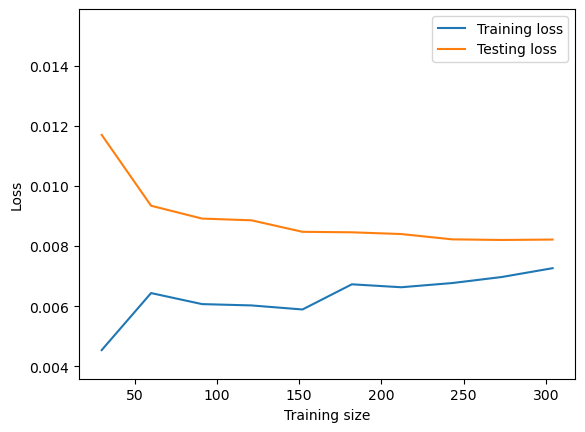

In [46]:
# define the training sizes for the learning curve
training_sizes = np.linspace(0.1, 1.0, 10)

# calculate the training and testing scores for different training sizes
training_sizes, training_scores, testing_scores = learning_curve(estimator=lasso, X=X_train, y=Y_train, train_sizes=training_sizes, scoring='neg_mean_squared_error')

# calculate the mean and standard deviation of the training and testing scores
training_mean = -np.mean(training_scores, axis=1)
training_std = np.std(training_scores, axis=1)
testing_mean = -np.mean(testing_scores, axis=1)
testing_std = np.std(testing_scores, axis=1)

# plot the learning curve
plt.plot(training_sizes, training_mean, label='Training loss')
plt.fill_between(training_sizes, training_mean - training_std, training_mean + training_std, alpha=0.0001)
plt.plot(training_sizes, testing_mean, label='Testing loss')
plt.fill_between(training_sizes, testing_mean - testing_std, testing_mean + testing_std, alpha=0.0001)
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.legend()
plt.show()

**L2 Regularization(Ridge) and Grid SearchCV**

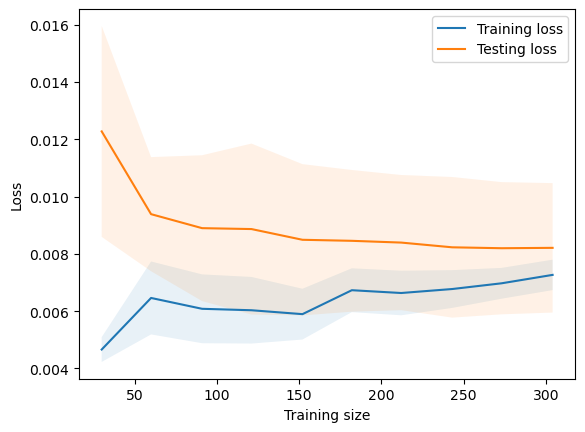

In [47]:
# define the training sizes for the learning curve
training_sizes = np.linspace(0.1, 1.0, 10)

# calculate the training and testing scores for different training sizes
training_sizes, training_scores, testing_scores = learning_curve(estimator=ridge, X=X_train, y=Y_train, train_sizes=training_sizes, scoring='neg_mean_squared_error')

# calculate the mean and standard deviation of the training and testing scores
training_mean = -np.mean(training_scores, axis=1)
training_std = np.std(training_scores, axis=1)
testing_mean = -np.mean(testing_scores, axis=1)
testing_std = np.std(testing_scores, axis=1)

# plot the learning curve
plt.plot(training_sizes, training_mean, label='Training loss')
plt.fill_between(training_sizes, training_mean - training_std, training_mean + training_std, alpha=0.1)
plt.plot(training_sizes, testing_mean, label='Testing loss')
plt.fill_between(training_sizes, testing_mean - testing_std, testing_mean + testing_std, alpha=0.1)
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.legend()
plt.show()

**ElascticNet Regression and GridSearchCV**

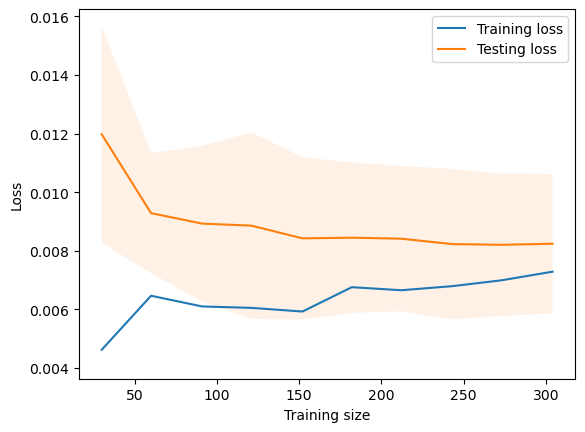

In [48]:
# define the training sizes for the learning curve
training_sizes = np.linspace(0.1, 1.0, 10)

# calculate the training and testing scores for different training sizes
training_sizes, training_scores, testing_scores = learning_curve(estimator=enet, X=X_train, y=Y_train, train_sizes=training_sizes, scoring='neg_mean_squared_error')

# calculate the mean and standard deviation of the training and testing scores
training_mean = -np.mean(training_scores, axis=1)
training_std = np.std(training_scores, axis=1)
testing_mean = -np.mean(testing_scores, axis=1)
testing_std = np.std(testing_scores, axis=1)

# plot the learning curve
plt.plot(training_sizes, training_mean, label='Training loss')
plt.fill_between(training_sizes, training_mean - training_std, training_mean + training_std, alpha=0.001)
plt.plot(training_sizes, testing_mean, label='Testing loss')
plt.fill_between(training_sizes, testing_mean - testing_std, testing_mean + testing_std, alpha=0.1)
plt.xlabel('Training size')
plt.ylabel('Loss')
plt.legend()
plt.show()